# 华为秋招面试题（技术岗）

科科最近学习中国象棋，今日的目标是象棋马走日。给定一个任意大小的棋盘，棋盘上的棋子有三种类型，马的起始位置，马要到达的目标位置、其他的棋子。

其他的棋子可能会限制马的前进路线，限制条件如下：
* 1、马走日的路径上不能被绊马脚；
* 2、马不能到达有棋子的位置。

可是科科是一个象棋新手，请你帮他计算出达到目标位置至少需要走几步，如果不能到达则输出-1。

马每次跳跃最多可以有八个方向，但如果前进方向有棋子，则表示被绊马脚。

例如下图，马的上方有棋子，则红色图形的点不能到达，五角星是马可以达到的位置。


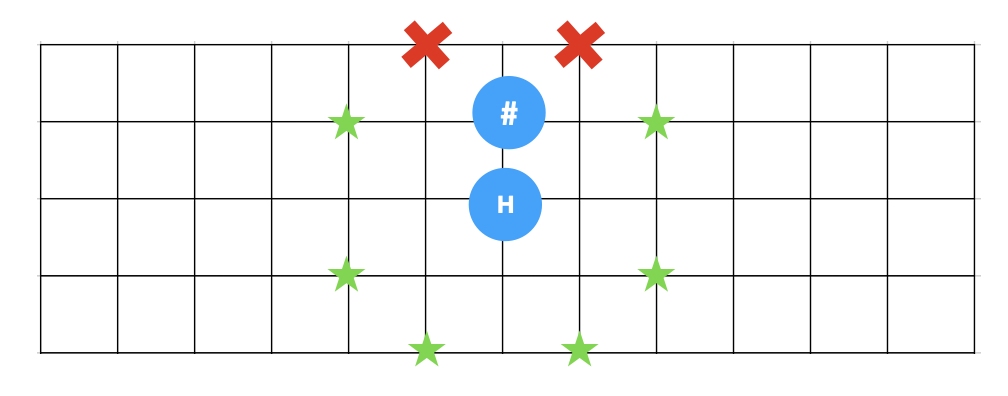

## 输入描述：

棋盘宽度w(1<=w<=150)，棋盘高度h(1<=h<=150)

棋局，二维数组char[w][h]。其中.表示没有棋子，#表示有棋子，H表示马当前位置，T表示马要达到的位置。

## 输出描述：

输出一个证书，代表马从H到达T最少的需要的步数。没有路径则输出-1。

## 示例1
### 输入
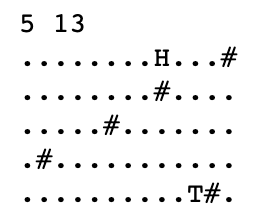
### 输出

$ 4$

### 说明
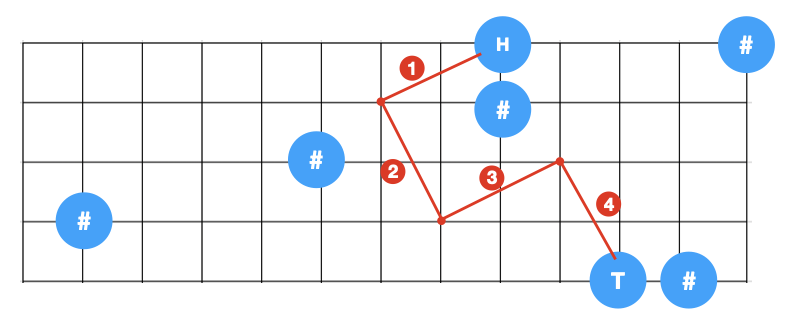

In [25]:
# input
char = ['........H...#',
        '........#....',
        '.....#.......',
        '.#...........',
        '..........T#.']

w = 5
h = 13


In [26]:
class Checkerboard:
    def __init__(self, w, h, char):
        self.w = w # 棋盘宽度
        self.h = h # 棋盘高度
        self.char = char # 棋盘
        
        self.all_obstacle_positions = [] # 所有会发生绊马脚的坐标位置
        self.all_arrive_positions = [] # 所有可以达到的坐标位置
        for i in range(w):
            for j in range(h):
                if self.char[i][j] == 'H':
                    self.horse_x, self.horse_y = i,j # 马的位置
                if self.char[i][j] == 'T': 
                    self.target_x, self.target_y = i,j # 目标位置
                if self.char[i][j] == '#': # 会发生绊马脚的坐标位置
                    self.all_obstacle_positions.append((i,j))
                else:
                    self.all_arrive_positions.append((i,j))
 
    def is_can_be_arrive(self,x,y):
        '''输入坐标位置，判断是否属于可抵达位置'''
        flag = False
        if x in range(self.w) and y in range(self.h): # 否在棋盘内
            if (x,y) not in self.all_obstacle_positions: # 不在其他棋子上
                flag = True
        return flag
    
    def get_distance_square(self,A,B):
        '''计算两点之间的平方距离'''
        x1,y1 = A
        x2,y2 = B 
        return (x1-x2)**2 + (y1 - y2)**2
    
    def get_optional_direction(self):
        '''不考虑能否达到的情况下，获得马可以移动的方向集合'''
        direction_ids = list(range(8))
        for (obs_x, obs_y) in self.all_obstacle_positions:
            distance_square = self.get_distance_square((self.horse_x, self.horse_y), (obs_x, obs_y))
            if distance_square == 1 :
                if obs_x > self.horse_x:
                    if 3 in direction_ids: direction_ids.remove(3)
                    if 4 in direction_ids: direction_ids.remove(4)

                if obs_x < self.horse_x :
                    if 0 in direction_ids: direction_ids.remove(0)
                    if 7 in direction_ids: direction_ids.remove(7)

                if obs_y > self.horse_y :
                    if 1 in direction_ids: direction_ids.remove(1)
                    if 2 in direction_ids: direction_ids.remove(2)

                if obs_y < self.horse_y :
                    if 5 in direction_ids: direction_ids.remove(5)
                    if 6 in direction_ids: direction_ids.remove(6)

        return direction_ids
    
    def get_horse_move_position(self, direction_id):
        '''输入需要移动的方向，获取马移动后的位置坐标'''
        if direction_id == 0 :
            new_x , new_y = self.horse_x - 2 , self.horse_y +1 
        elif direction_id == 1 :
            new_x , new_y = self.horse_x -1 , self.horse_y + 2 
        elif direction_id == 2 :
            new_x , new_y = self.horse_x + 1 , self.horse_y + 2 
        elif direction_id == 3 :
            new_x , new_y = self.horse_x + 2 , self.horse_y + 1
        elif direction_id == 4 :
            new_x , new_y = self.horse_x + 2 , self.horse_y - 1
        elif direction_id == 5 :
            new_x , new_y = self.horse_x + 1 , self.horse_y - 2 
        elif direction_id == 6 :
            new_x , new_y = self.horse_x -1 , self.horse_y - 2
        elif direction_id == 7 :
            new_x , new_y = self.horse_x -2 , self.horse_y - 1
        else:
            new_x , new_y = None, None
        return new_x , new_y
    
    def update_horse_position(self, direction_id):
        '''输入移动的方向，更新马移动后的坐标'''
        new_x , new_y = self.get_horse_move_position(direction_id)
        self.horse_x, self.horse_y = new_x , new_y
        
    def get_direction_candidates(self):
        '''获取马可以进行移动的方向集合'''
        candidate_ids = []
        optional_directions = self.get_optional_direction() # 不考虑能否达到，可以进行选择的方向，
        for direction_id in optional_directions:
            new_x , new_y = self.get_horse_move_position(direction_id) 
            arrive_flag = self.is_can_be_arrive(new_x , new_y) # 能否到达
            if arrive_flag:
                candidate_ids.append(direction_id)
        return candidate_ids

In [27]:
class Node:
    def __init__(self, depth, direction_id, horse_x, horse_y):
        self.depth = depth
        self.direction_id = direction_id
        self.father = None
        self.children = []
        self.is_end_leaf = False
        self.horse_x = horse_x
        self.horse_y = horse_y


class Tree:
    def __init__(self):
        self.depth_nodes = dict() # 树的层数对应其当层的所有节点list
        self.arrived_positions = []

In [28]:
tree = Tree()
checkerboard = Checkerboard(w, h ,char)
horse_position = checkerboard.horse_x, checkerboard.horse_y
target_position = checkerboard.target_x, checkerboard.target_y
min_distance = checkerboard.get_distance_square(horse_position, target_position)

horse_x, horse_y = horse_position
depth = 0
node = Node(depth, None, horse_x, horse_y)

if depth not in tree.depth_nodes:
    tree.depth_nodes[depth] = []
    
tree.depth_nodes[depth].append(node)
tree.arrived_positions.append((horse_x, horse_y))
num_arrived = len(tree.arrived_positions)

while min_distance > 0 :
    tree.depth_nodes[depth+1] = []
    for temp_node in tree.depth_nodes[depth]: # 对于每一深度的节点进行遍历
        horse_x, horse_y = temp_node.horse_x, temp_node.horse_y # 获取节点中马的坐标位置
        checkerboard.horse_x = horse_x # 更新棋盘中马的坐标位置
        checkerboard.horse_y = horse_y 
        candidate_ids = checkerboard.get_direction_candidates() # 该节点中，马的可移动方向
        for direction_id in candidate_ids: # 对于每个可移动方向，生成其子节点
            new_x , new_y = checkerboard.get_horse_move_position(direction_id) # 马移动后的位置坐标
            horse_position = new_x , new_y
            if horse_position not in tree.arrived_positions: 
                tree.arrived_positions.append(horse_position) # 记录马已经遍历过的位置
                distance = checkerboard.get_distance_square(horse_position, target_position) # 计算与目标位置的距离
                son_node = Node(depth+1, direction_id, new_x , new_y) # 生成子节点
                son_node.father = temp_node 
                tree.depth_nodes[depth+1].append(son_node)
                if distance < min_distance:
                    min_distance = distance            
        
    depth += 1 
    if min_distance == 0 or len(tree.arrived_positions) == num_arrived:
        break
    else:
        num_arrived = len(tree.arrived_positions)
        
if min_distance == 0:
    print(depth)
else:
    print(-1)

4
